In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


In [2]:
df_raw = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')


In [3]:
df_raw.set_index('Country', inplace=True)

In [4]:
df_raw.shape

(195, 38)

In [5]:
df_raw.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Continent  195 non-null    object
 1   Region     195 non-null    object
 2   DevName    195 non-null    object
 3   1980       195 non-null    int64 
 4   1981       195 non-null    int64 
 5   1982       195 non-null    int64 
 6   1983       195 non-null    int64 
 7   1984       195 non-null    int64 
 8   1985       195 non-null    int64 
 9   1986       195 non-null    int64 
 10  1987       195 non-null    int64 
 11  1988       195 non-null    int64 
 12  1989       195 non-null    int64 
 13  1990       195 non-null    int64 
 14  1991       195 non-null    int64 
 15  1992       195 non-null    int64 
 16  1993       195 non-null    int64 
 17  1994       195 non-null    int64 
 18  1995       195 non-null    int64 
 19  1996       195 non-null    int64 
 20  1997       195 non-nul

In [7]:
years = np.arange(1980,2014)
years

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013])

In [8]:
continents = df_raw.groupby(['Continent'],axis=0).sum(numeric_only=True)
continents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Africa to Oceania
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1980    6 non-null      int64
 1   1981    6 non-null      int64
 2   1982    6 non-null      int64
 3   1983    6 non-null      int64
 4   1984    6 non-null      int64
 5   1985    6 non-null      int64
 6   1986    6 non-null      int64
 7   1987    6 non-null      int64
 8   1988    6 non-null      int64
 9   1989    6 non-null      int64
 10  1990    6 non-null      int64
 11  1991    6 non-null      int64
 12  1992    6 non-null      int64
 13  1993    6 non-null      int64
 14  1994    6 non-null      int64
 15  1995    6 non-null      int64
 16  1996    6 non-null      int64
 17  1997    6 non-null      int64
 18  1998    6 non-null      int64
 19  1999    6 non-null      int64
 20  2000    6 non-null      int64
 21  2001    6 non-null      int64
 22  2002    6 non-null      int64
 23  2003    6 non

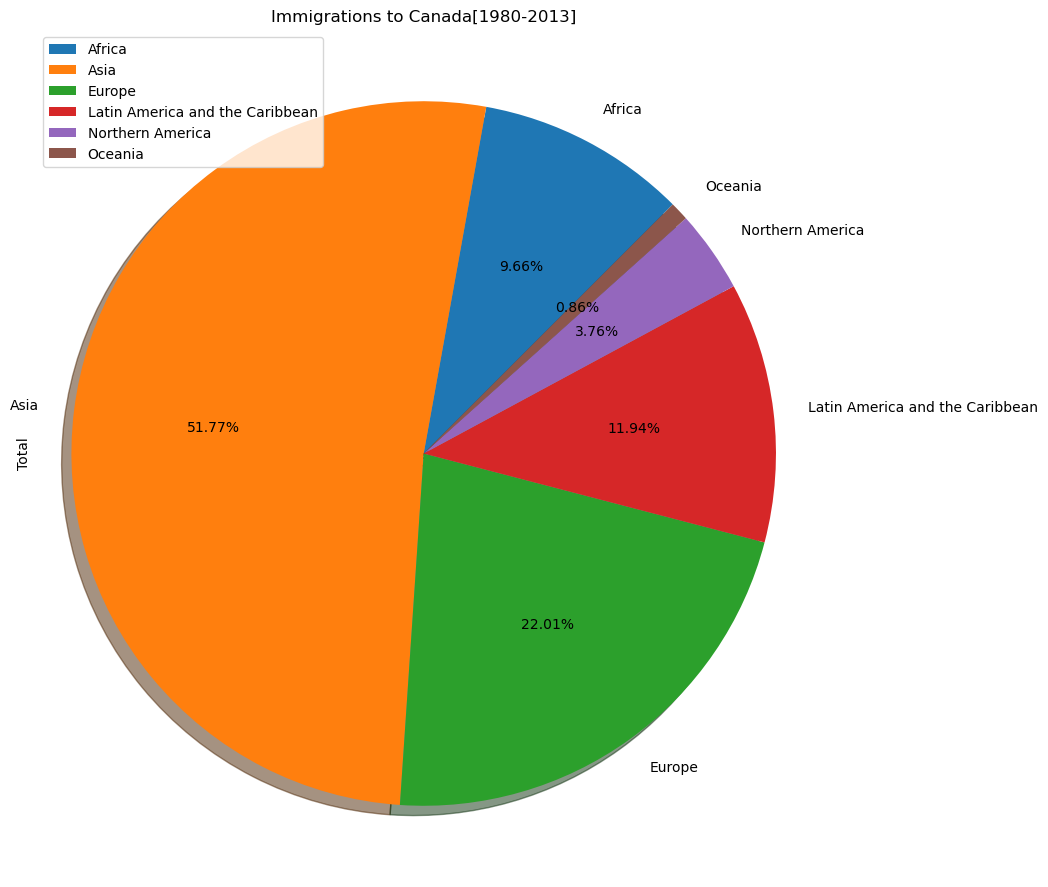

In [9]:
continents.Total.plot(kind='pie', 
                      figsize=(10,11),
                      shadow=True,
                      startangle=45,
                      autopct='%1.2f%%'
                     )
plt.axis('equal')
plt.title('Immigrations to Canada[1980-2013]')
plt.legend(labels=continents.index, loc='upper left')
plt.show()

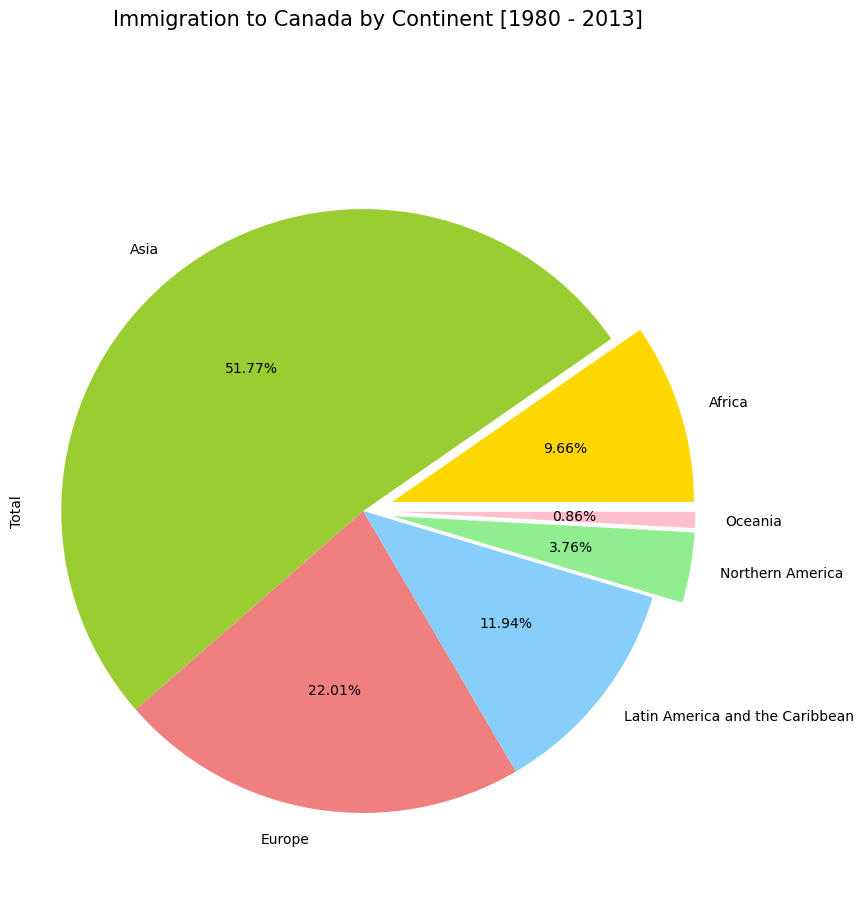

In [10]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

continents.Total.plot(kind='pie',
                      figsize=(9,10),
                      autopct='%1.2f%%',
                      shadow=False,
                      startangle=0,
                      colors=colors_list,
                      explode=explode_list
                     )

plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12, fontsize = 15) 

plt.axis('equal') 

# add legend
# plt.legend(labels=continents.index, loc='upper left', fontsize=7) 

plt.show()



In [11]:
yearsl = list(map(str, range(1980,2014)))
cji = df_raw.loc[['Japan','India','China'],years.astype(str)].transpose()
cji.head()

Country,Japan,India,China
1980,701,8880,5123
1981,756,8670,6682
1982,598,8147,3308
1983,309,7338,1863
1984,246,5704,1527


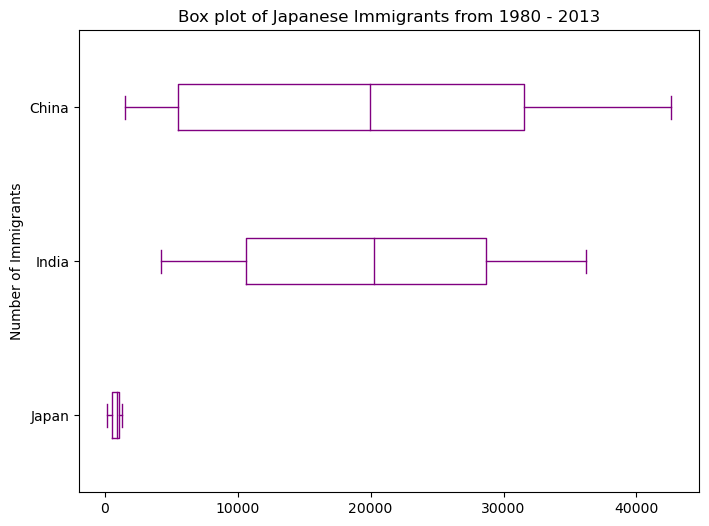

In [12]:
cji.plot(kind='box',
          figsize=(8,6),
        color='purple',
         vert=False
        )

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [13]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [14]:
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

cji.plot(kind='box', figsize=(20,6), color='purple', vert=False, ax=ax0)
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

cji.plot(kind='line', figsize=(20,6), ax=ax1)
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

In [15]:
df_raw.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [16]:
continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


In [17]:
totalYW = pd.DataFrame(df_raw[yearsl].sum())

In [18]:
totalYW.index = map(int, totalYW.index)
totalYW.reset_index(inplace=True)
totalYW.columns = ['year','total']
totalYW.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


In [19]:
totalYW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    34 non-null     int64
 1   total   34 non-null     int64
dtypes: int64(2)
memory usage: 672.0 bytes


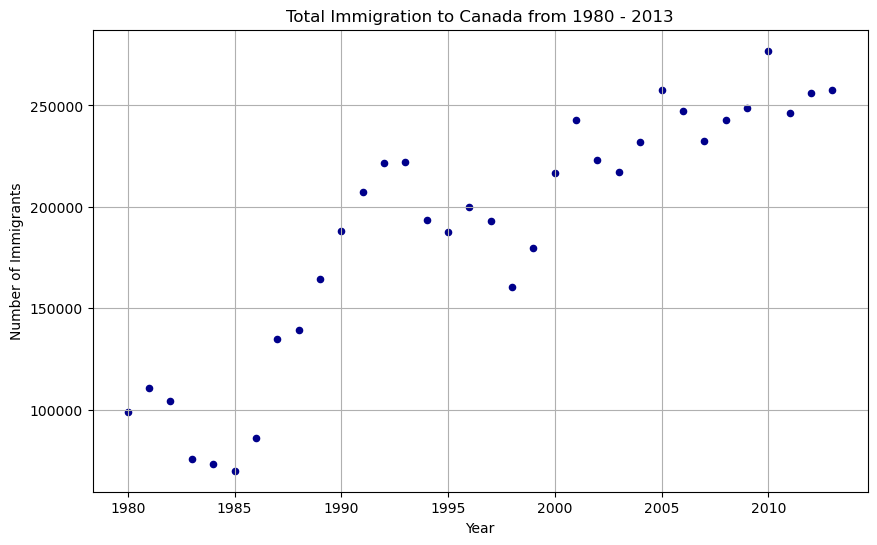

In [20]:
totalYW.plot(kind='scatter',
             figsize=(10,6),
             x='year',
             y='total',
             color='darkblue'
            )


plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.grid()

plt.show()

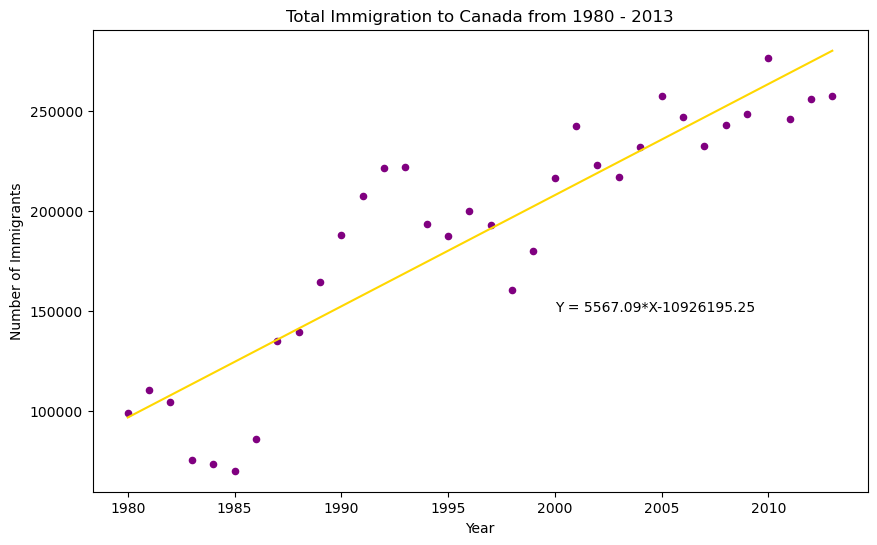

In [21]:
totalYW.plot(kind='scatter', x='year', y='total', figsize=(10,6), color="Purple")

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

linr = np.polyfit(totalYW['year'], totalYW['total'], deg=1)

plt.plot(totalYW['year'], linr[1]+linr[0]*totalYW['year'], color='gold')
plt.annotate('Y = {0:.2f}*X{1:.2f}'.format(linr[0],linr[1]), xy=(2000,150000))
# plt.legend('Y = {0:.2f}*X{1:.2f}'.format(linr[0],linr[1]))
plt.show()

In [22]:
linr[0],linr[1]

(5567.092284186346, -10926195.24537804)

In [23]:
ywise = df_raw[yearsl].transpose()
ywise.head()

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
1980,16,1,80,0,0,1,0,368,0,702,...,9378,128,0,0,103,1191,0,1,11,72
1981,39,0,67,1,0,3,0,426,0,639,...,10030,132,0,0,117,1829,0,2,17,114
1982,39,0,71,0,0,6,0,626,0,484,...,9074,146,0,0,174,2162,0,1,11,102
1983,47,0,69,0,0,6,0,241,0,317,...,7100,105,0,0,124,3404,0,6,7,44
1984,71,0,63,0,0,4,42,237,0,317,...,6661,90,0,0,142,7583,0,0,16,32


In [24]:
ywise.index.name='year'
ywise.index = ywise.index.map(int)
ywise.reset_index(inplace=True)
ywise.head()

Country,year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [25]:
# normalize Brazil data
norm_india = (ywise['India'] - ywise['India'].min()) / (ywise['India'].max() - ywise['India'].min())

# normalize Argentina data
norm_usa = (ywise['United States of America'] - ywise['United States of America'].min()) / (ywise['United States of America'].max() - ywise['United States of America'].min())

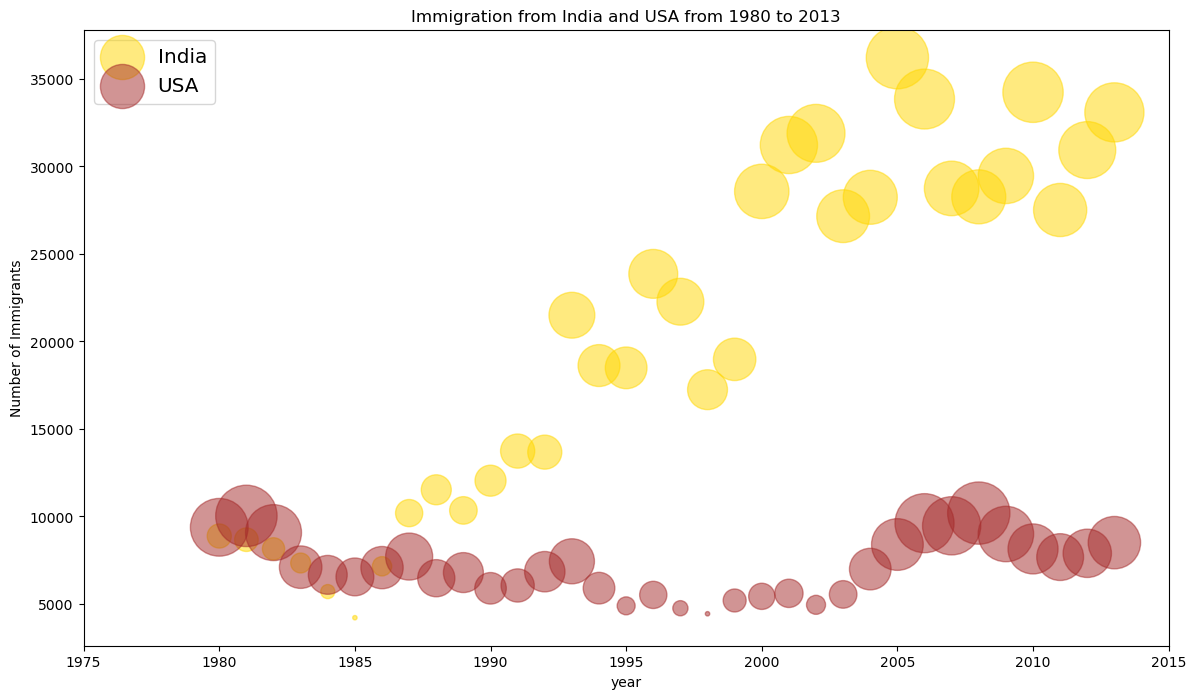

In [26]:
ax0 = ywise.plot(kind='scatter', x='year', y='India', figsize=(14,8), alpha=0.5, color='gold', s=norm_india*2000+10, xlim=(1975,2015))
ax1 = ywise.plot(kind='scatter', x='year', y='United States of America', figsize=(14,8), alpha=0.5, color='brown', s=norm_usa*2000+10,ax=ax0)

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from India and USA from 1980 to 2013')
ax0.legend(['India', 'USA'], loc='upper left', fontsize='x-large')


### Plotting with matplotlib

In [27]:
totimm = df_raw[yearsl].sum()
totimm

1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
1985     69978
1986     86048
1987    134771
1988    139306
1989    164432
1990    188054
1991    207509
1992    221687
1993    222049
1994    193665
1995    187712
1996    200085
1997    192885
1998    160727
1999    179818
2000    216712
2001    242643
2002    223111
2003    217297
2004    232083
2005    257457
2006    247057
2007    232405
2008    243047
2009    248768
2010    276956
2011    246194
2012    256222
2013    257537
dtype: int64

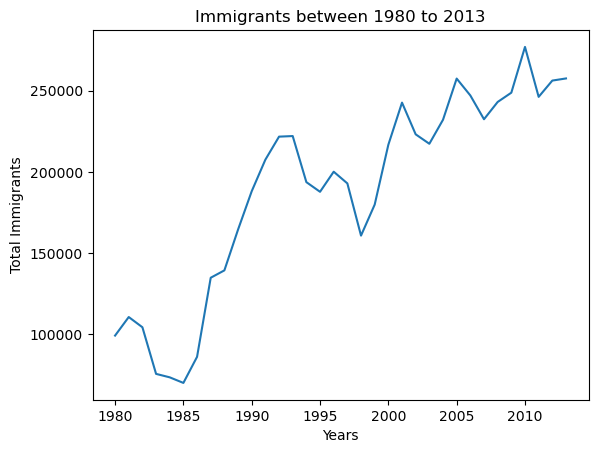

In [28]:
fig, ax = plt.subplots()

totimm.index = totimm.index.map(int)
ax.plot(totimm)
ax.set_title('Immigrants between 1980 to 2013') 
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')

#Display the plot
plt.show()

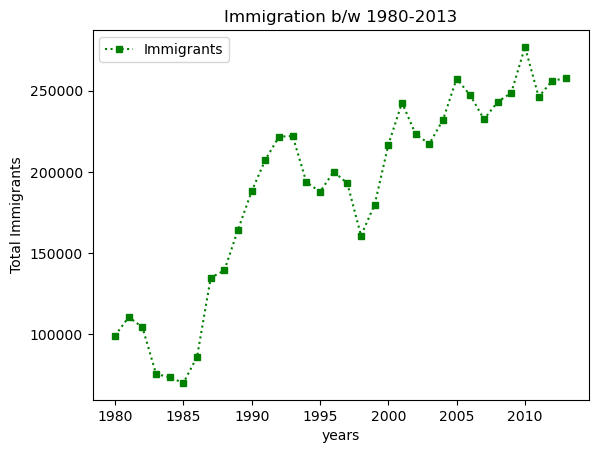

In [29]:
fig,ax = plt.subplots()
ax.plot(totimm, marker='s', markersize=5, color='green', linestyle='dotted')
ax.set_title('Immigration b/w 1980-2013')
ax.set_xlabel('years')
ax.set_ylabel('Total Immigrants')
ax.legend(['Immigrants'])

plt.show()

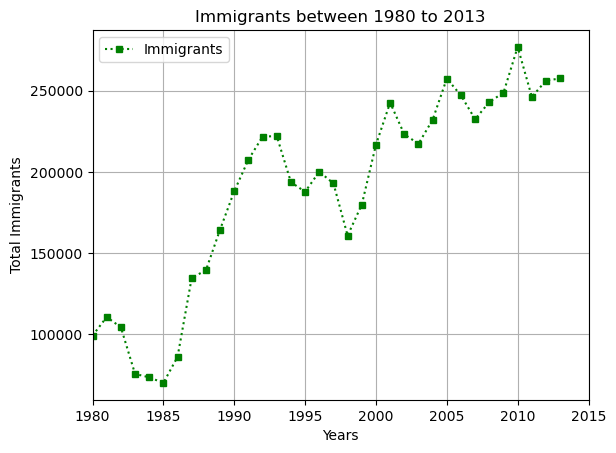

In [30]:
#Create figure and axes
fig, ax = plt.subplots()

# Plot the line
ax.plot(totimm, 
        marker='s', #Including markers in squares shapes
        markersize=5, #Setting the size of the marker
        color='green', #Changing the color of the line
        linestyle="dotted") #Changing the line style to a Dotted line

ax.set_title('Immigrants between 1980 to 2013') 
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')

plt.xlim(1980,2015)
plt.grid()
plt.legend(['Immigrants'])
plt.show()

In [31]:
dfi = df_raw.reset_index()

In [32]:
haiti = dfi[dfi.Country == 'Haiti'][yearsl].T
haiti.index = haiti.index.map(int)
# haiti.reset_index(inplace=True)
haiti.columns = ['total']
haiti.head()

,total
1980,1666
1981,3692
1982,3498
1983,2860
1984,1418


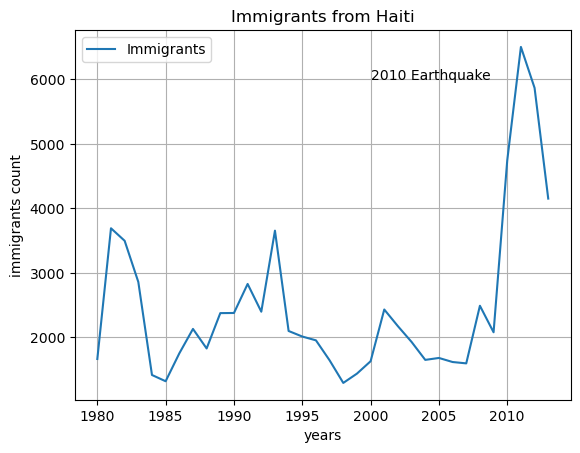

In [33]:
fig,ax = plt.subplots()
ax.plot(haiti)
ax.set_title('Immigrants from Haiti')
ax.set_xlabel('years')
ax.set_ylabel('immigrants count')
plt.grid()
plt.legend(['Immigrants'])
ax.annotate('2010 Earthquake',xy=(2000, 6000))

plt.show()

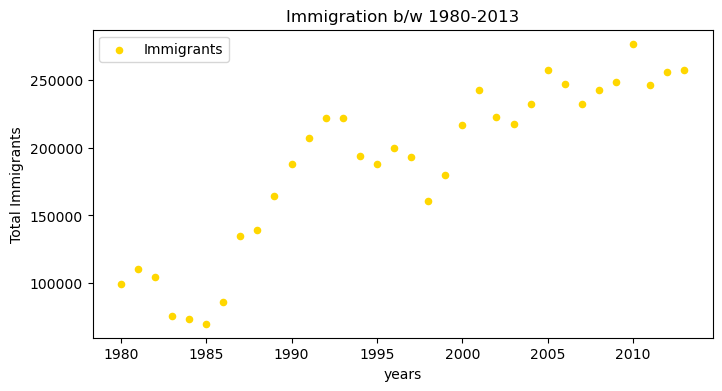

In [34]:
fig,ax = plt.subplots(figsize=(8,4))
totimm.index = totimm.index.map(int)
ax.scatter(totimm.index,totimm, marker='o', s=20, color='gold')
ax.set_title('Immigration b/w 1980-2013')
ax.set_xlabel('years')
ax.set_ylabel('Total Immigrants')
ax.legend(['Immigrants'])

plt.show()

In [35]:
df_raw.sort_values(['Total'], ascending=False, axis=0, inplace=True)
top5 = df_raw.head().reset_index()
label = list(top5.Country)
label

['India',
 'China',
 'United Kingdom of Great Britain and Northern Ireland',
 'Philippines',
 'Pakistan']

In [36]:
label[2]='UK'

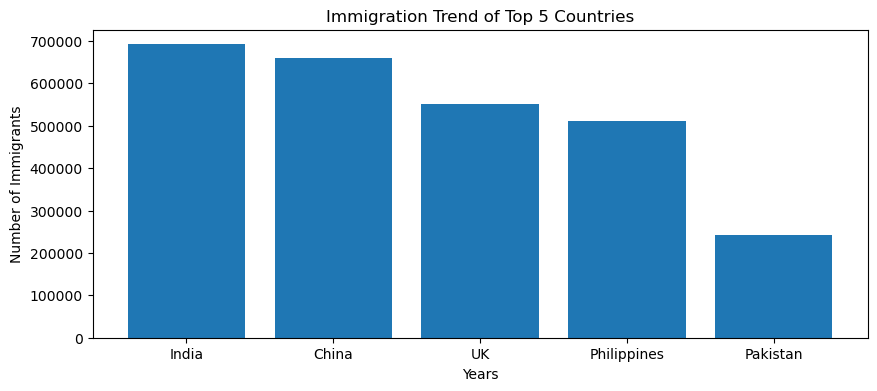

In [37]:
fig,ax = plt.subplots(figsize=(10,4))
ax.bar(label, top5['Total'], label=label)

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

plt.show()

In [38]:
continents.reset_index(inplace=True)

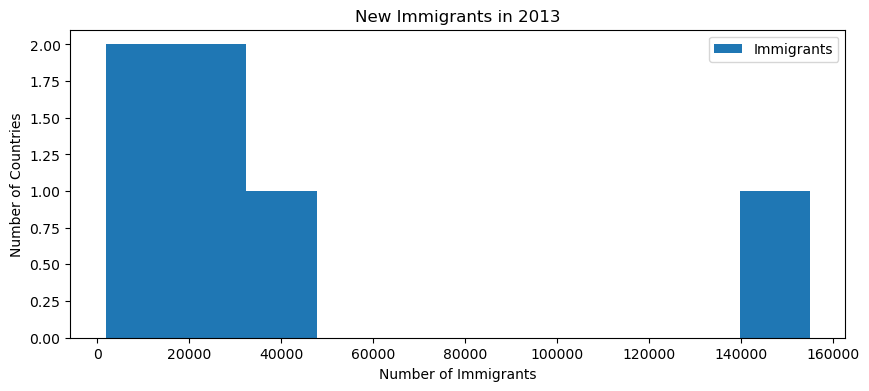

In [39]:
fig,ax = plt.subplots(figsize=(10,4))
ax.hist(continents['2013'])

ax.set_title('New Immigrants in 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Countries')
ax.legend(['Immigrants'])

#Display the plot
plt.show()

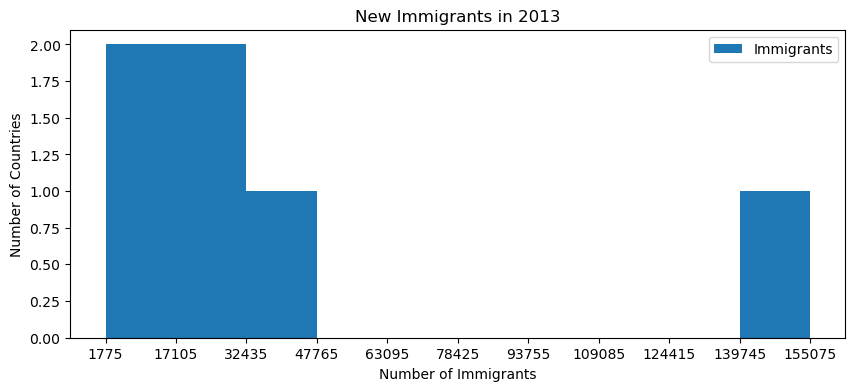

In [40]:
fig,ax = plt.subplots(figsize=(10,4))
count = ax.hist(continents['2013'])

ax.set_title('New Immigrants in 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Countries')
ax.legend(['Immigrants'])
ax.set_xticks(list(map(int,count[1])))
#Display the plot
plt.show()

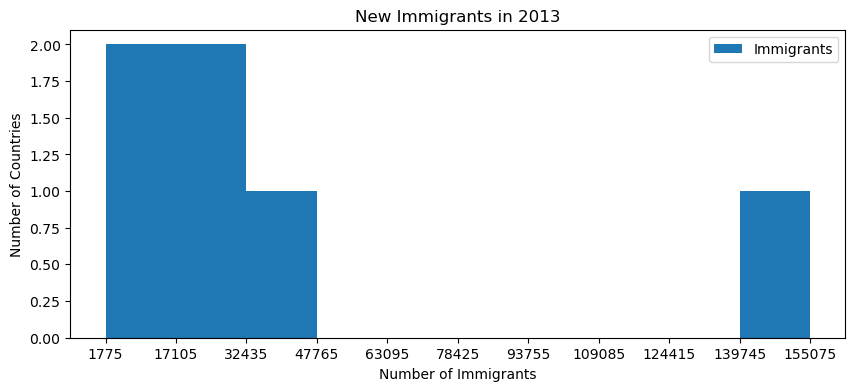

In [41]:
fig,ax = plt.subplots(figsize=(10,4))
count = ax.hist(continents['2013'])

ax.set_title('New Immigrants in 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Countries')
ax.legend(['Immigrants'])
ax.set_xticks(list(map(int,count[1])))
#Display the plot
plt.show()

In [42]:
continents.head()

,Continent,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
1,Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
2,Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
3,Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
4,Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


In [43]:
cont = continents.head(6)
label = list(cont.Continent)
label
cont

,Continent,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
1,Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
2,Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
3,Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
4,Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
5,Oceania,1942,1839,1675,1018,878,920,904,1200,1181,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


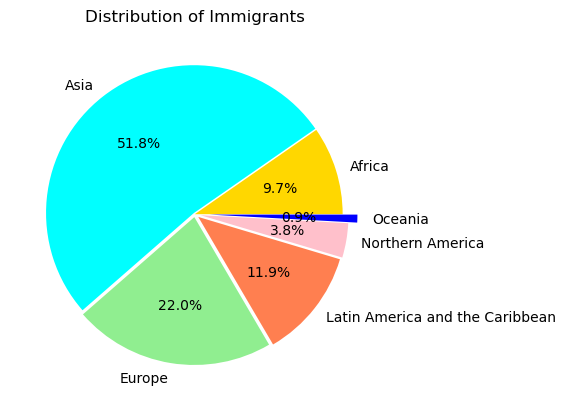

In [44]:
fig,ax =plt.subplots()
ax.pie(cont['Total'], labels = label, colors = ['gold','cyan','lightgreen','coral','pink', 'blue'], autopct='%1.1f%%', explode=[0,0.01,0.02,0.03,0.04,0.1])
ax.set_aspect('equal')
plt.title('Distribution of Immigrants')
plt.show()

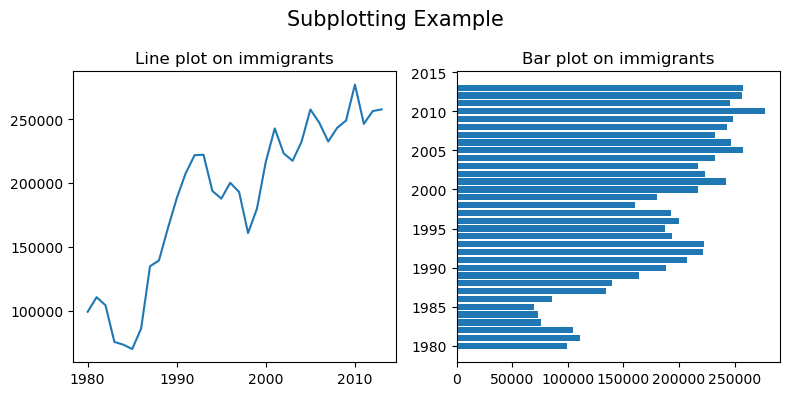

In [45]:
fig = plt.figure(figsize=(8,4))

axs1 = fig.add_subplot(1,2,1)
axs1.plot(totimm)
axs1.set_title("Line plot on immigrants")

axs2 = fig.add_subplot(1,2,2)
axs2.barh(totimm.index, totimm)
axs2.set_title("Bar plot on immigrants")

fig.suptitle('Subplotting Example', fontsize=15)
fig.tight_layout()
plt.show()

In [46]:
!pip install pywaffle

In [47]:
from pywaffle import Waffle

In [48]:
dns = df_raw.loc[['Denmark','Norway','Sweden'],]

In [49]:
dns

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


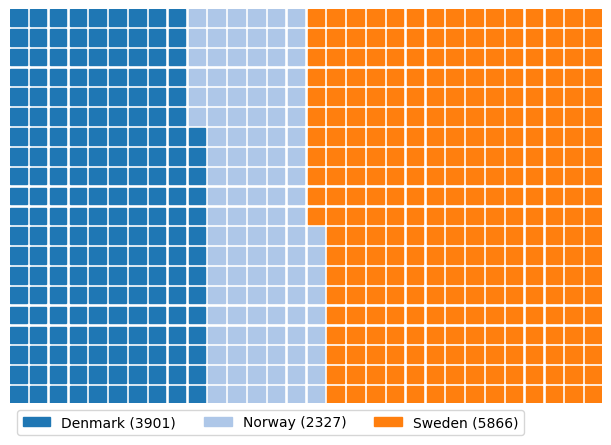

In [50]:
fig = plt.figure(FigureClass = Waffle, rows=20,columns=30, values=dns['Total'], cmap_name='tab20', 
                 legend={'labels' : [f"{k} ({v})" for k,v in zip(dns.index.values,dns.Total)],
                         'loc':'lower left',
                         'bbox_to_anchor':(0,-0.1),
                         'ncol':3
                        }
                )
                         
plt.show()

In [51]:
from wordcloud import WordCloud, STOPWORDS

In [52]:
import urllib

# # open the file and read it into a variable alice_novel
alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

In [53]:
stopwords=set(STOPWORDS)
wc = WordCloud()
wc.generate(alice_novel)

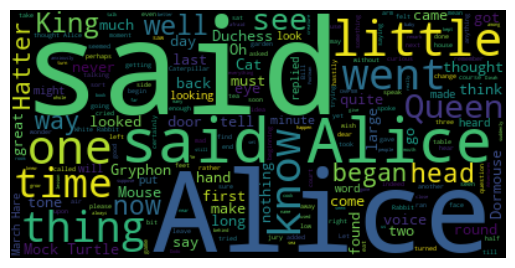

In [54]:
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [55]:
ttl = df_raw.Total.sum()

In [56]:
max_words=90
word_string=''
for cntr in df_raw.index.values:
    # if cntr.count(" ") != 0:
    #     ct = cntr.replace(" ", "-")
    # else:
    #     ct = cntr
    if cntr.count(" ") == 0:
        repeat_num_times = int(df_raw.loc[cntr, 'Total'] / ttl*max_words)
        word_string = word_string + ((cntr + ' ')*repeat_num_times)
        
word_string
        

'India India India India India India India India India China China China China China China China China China Philippines Philippines Philippines Philippines Philippines Philippines Philippines Pakistan Pakistan Pakistan Poland Lebanon France Jamaica Romania Haiti Guyana Portugal Egypt Morocco Colombia '

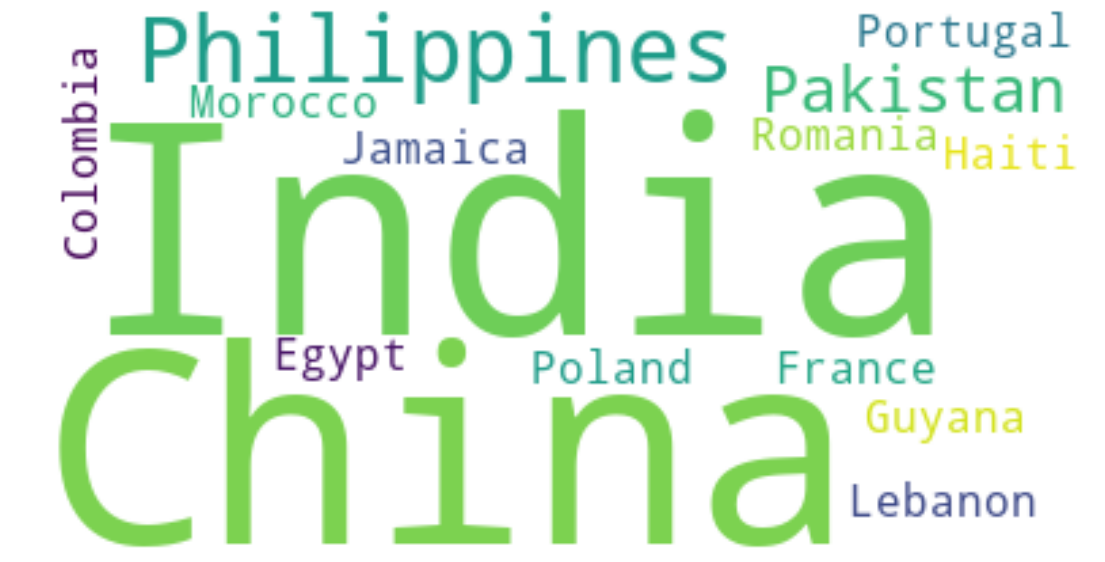

In [57]:
wc = WordCloud(background_color='white').generate(word_string)

plt.figure(figsize=(14,18))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: xlabel='Continent', ylabel='count'>

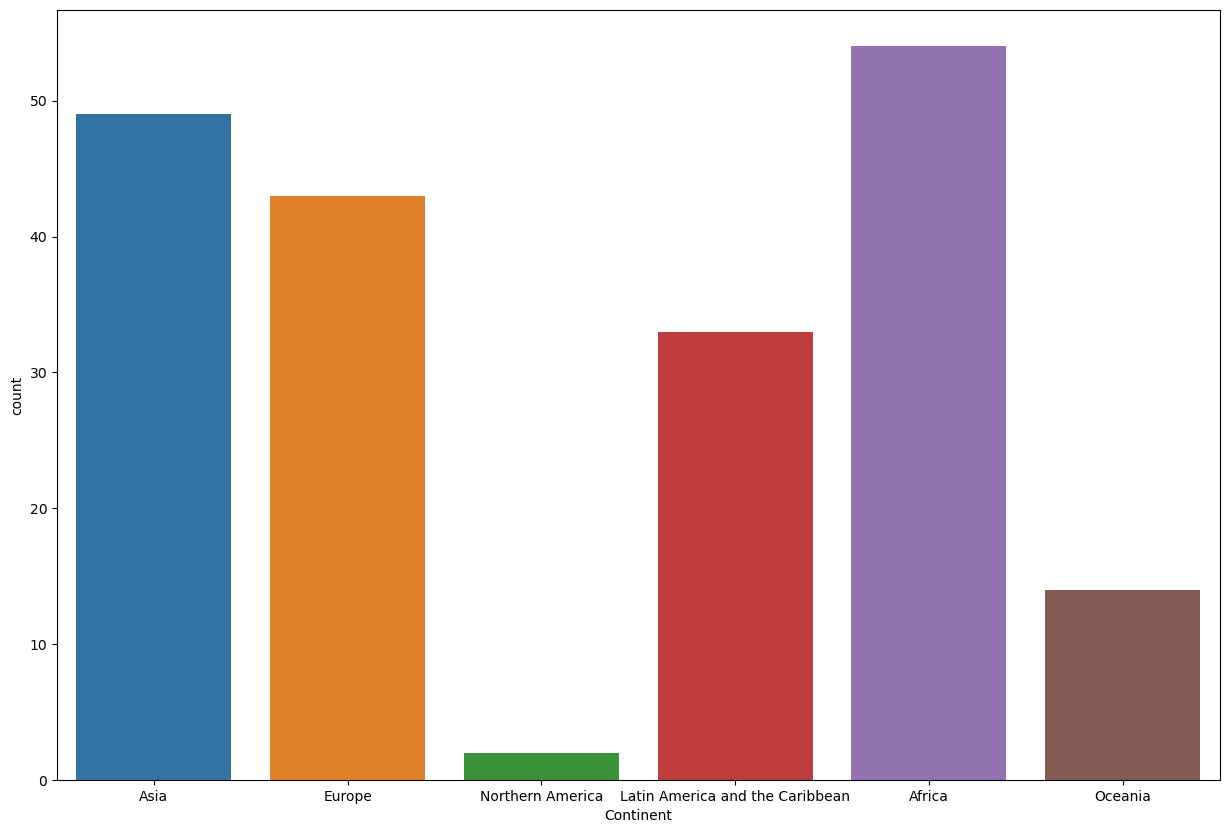

In [58]:
import seaborn as sns

plt.figure(figsize=(15,10))
sns.countplot(x='Continent', data=df_raw)


<Axes: xlabel='Continent', ylabel='Total'>

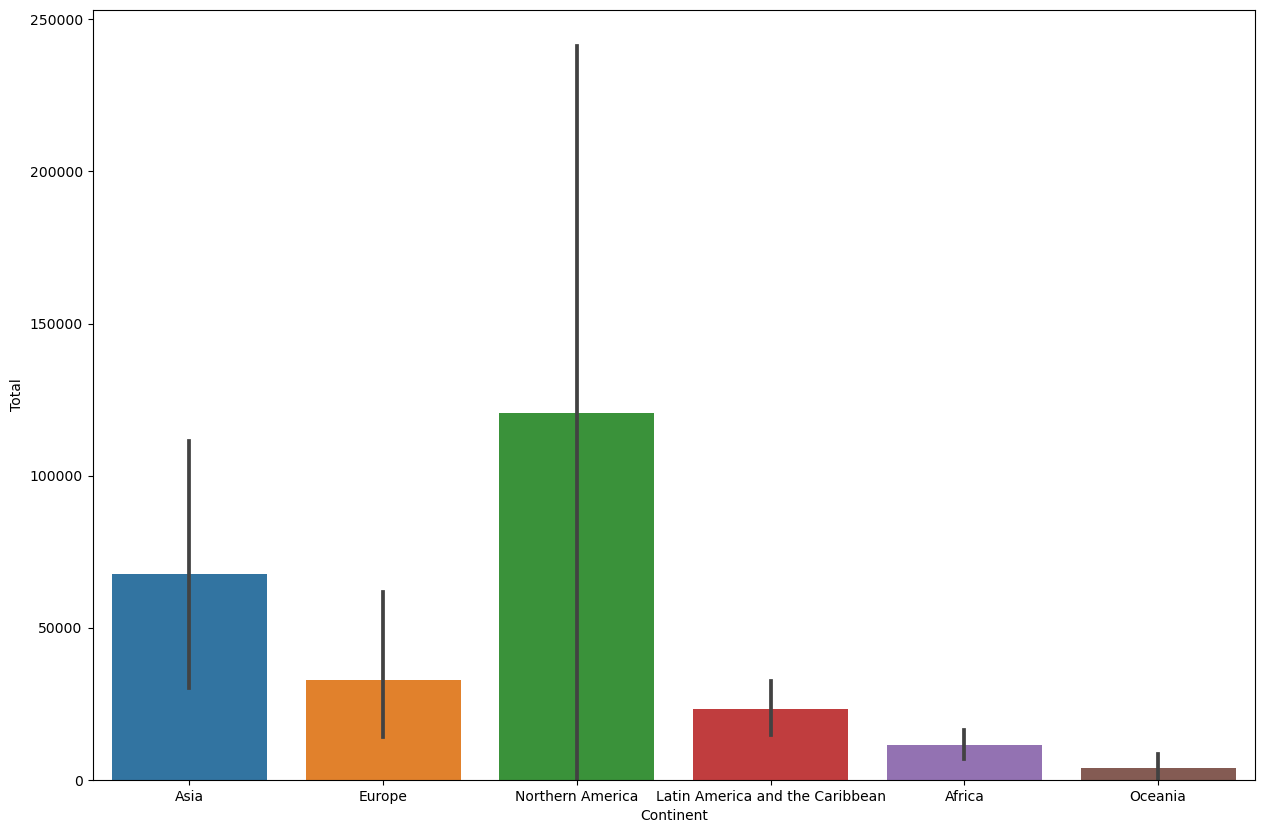

In [59]:
plt.figure(figsize=(15,10))
sns.barplot(x='Continent', y='Total', data=df_raw)

In [60]:
tot = df_raw[yearsl].sum().to_frame()

In [61]:
tot

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417
1985,69978
1986,86048
1987,134771
1988,139306
1989,164432


In [62]:
tot.index = map(int, tot.index)
tot.index.name = 'year'
tot.columns = ['total']
tot.reset_index(inplace=True)
tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


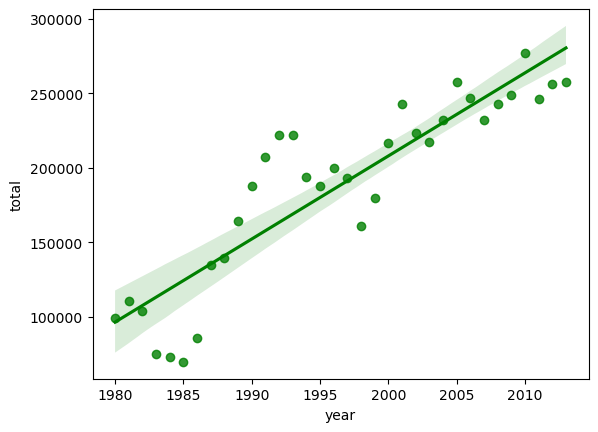

In [63]:
sns.regplot(x='year', y='total', data=tot, color='green', marker='o')
plt.show()

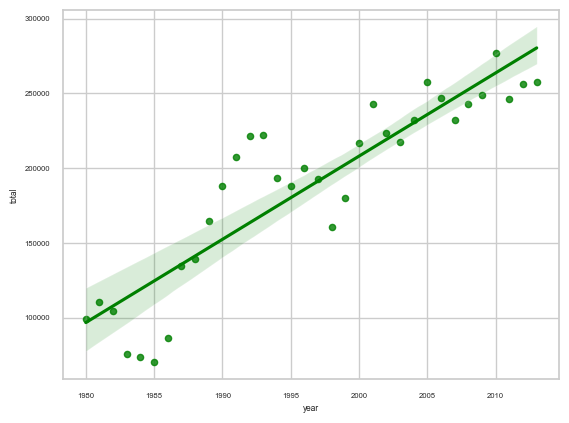

In [64]:
sns.set(font_scale=0.5)
sns.set_style('whitegrid')
sns.regplot(x='year', y='total', data=tot, color='green', marker='o', scatter_kws={'s':20})

plt.show()

In [65]:
!pip3 install folium==0.5.0
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [66]:
worldmap = folium.Map()
worldmap

In [71]:
worldmap = folium.Map(location=[56.130, -106.35], zoom_start=3.4)
worldmap

In [72]:
worldmap = folium.Map(location=[56.130, -106.35], zoom_start=3.4, tiles='Stamen Toner')
worldmap

In [73]:
worldmap = folium.Map(location=[56.130, -106.35], zoom_start=3.4, tiles='Stamen terrain')
worldmap

In [74]:
df_incidents = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe!')
df_incidents.head()

Dataset downloaded and read into a pandas dataframe!


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [75]:
df_incidents.shape

(150500, 13)

In [76]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IncidntNum  150500 non-null  int64  
 1   Category    150500 non-null  object 
 2   Descript    150500 non-null  object 
 3   DayOfWeek   150500 non-null  object 
 4   Date        150500 non-null  object 
 5   Time        150500 non-null  object 
 6   PdDistrict  150499 non-null  object 
 7   Resolution  150500 non-null  object 
 8   Address     150500 non-null  object 
 9   X           150500 non-null  float64
 10  Y           150500 non-null  float64
 11  Location    150500 non-null  object 
 12  PdId        150500 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 14.9+ MB


In [77]:
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

In [78]:
df_incidents.shape

(100, 13)

In [79]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [80]:
sfmap = folium.Map(location=[latitude,longitude], zoom_start=12)
sfmap

In [83]:
incidents = folium.map.FeatureGroup()

for lat,lon in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker([lat,lon], radius=5, color='yellow', fill=True, fill_color='blue', fill_opacity=0.6)
    )
    
sfmap.add_child(incidents)

In [84]:
lats = list(df_incidents.Y)
long = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat,lon,lbl in zip(lats, long, labels):
    folium.Marker([lat,lon], popup=lbl).add_to(sfmap)
    
sfmap

In [85]:
sfmap = folium.Map(location=[latitude, longitude], zoom_start=12)
incidents = folium.map.FeatureGroup()

for lat,lon,lbl in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    incidents.add_child(
        folium.CircleMarker([lat,lon], radius=5, color='yellow', fill=True, popup=lbl, fill_color='blue', fill_opacity=0.6)
    )
    
sfmap.add_child(incidents)

In [87]:
from folium import plugins
sfmap = folium.Map(location=[latitude,longitude], zoom_start=12)

incidents = plugins.MarkerCluster().add_to(sfmap)

for lat,lon,lbl in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(location=[lat,lon], icon=None, popup=lbl).add_to(incidents)
    
sfmap

In [88]:
world_geo = r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json' # geojson file
worldmap = folium.Map(location=[0,0],zoom_start=2)
worldmap

In [93]:
df_raw.reset_index(inplace=True)

worldmap.choropleth(
    geo_data=world_geo,data=df_raw,columns=['Country','Total'],
    fill_color='YlOrRd',fill_opacity=0.7, line_opacity=0.2,
    legend_name='Immigration to Canada', key_on='feature.properties.name'
)

worldmap

In [91]:
df_raw.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [94]:
thscale = np.linspace(df_raw.Total.min(), df_raw.Total.max(), 6, dtype=int).tolist()
thscale[-1] = thscale[-1]+1

worldmap.choropleth(
    geo_data=world_geo,data=df_raw,columns=['Country','Total'],
    fill_color='YlOrRd',fill_opacity=0.7, line_opacity=0.2,
    legend_name='Immigration to Canada', key_on='feature.properties.name',
    threshold_scale=thscale
)

worldmap